# Explore here

In [5]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para poder hacer gráficos:
import matplotlib.pyplot as plt

# Líbrería para poder aplicar el Test de Dickey - Fuller: 
from statsmodels.tsa.stattools import adfuller

# Librería para poder realizar operaciones matemáticas:
import numpy as np

# Librería para ajustar modelos ARIMA automáticamente:
from pmdarima import auto_arima

# Librería para calcular el MAE y el MSE:
from sklearn.metrics import mean_absolute_error, mean_squared_error



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:

df = pd.read_csv ('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv');

pd.set_option('display.max_columns', None);

df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [ ]:
df.shape[0]

366

In [ ]:
df.shape[1]

2

Hay 366 ventas con dos tipos de informacion :   dia y fecha de la venta y el total

In [ ]:
df.dtypes

date      object
sales    float64
dtype: object

Transformamos date de object a formato datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

Los registros de tiempo se hacen todos los dias a la misma hora durante un año por lo tanto podemos quitar time puesto que no sera relevante

In [ ]:
df['date'] = df['date'].dt.date
df.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


In [ ]:
df.nunique()

date     366
sales    366
dtype: int64

In [ ]:
# Buscamos ventas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

date     0
sales    0
dtype: int64

Vamos a graficar las ventas para podemos ver una tendencia

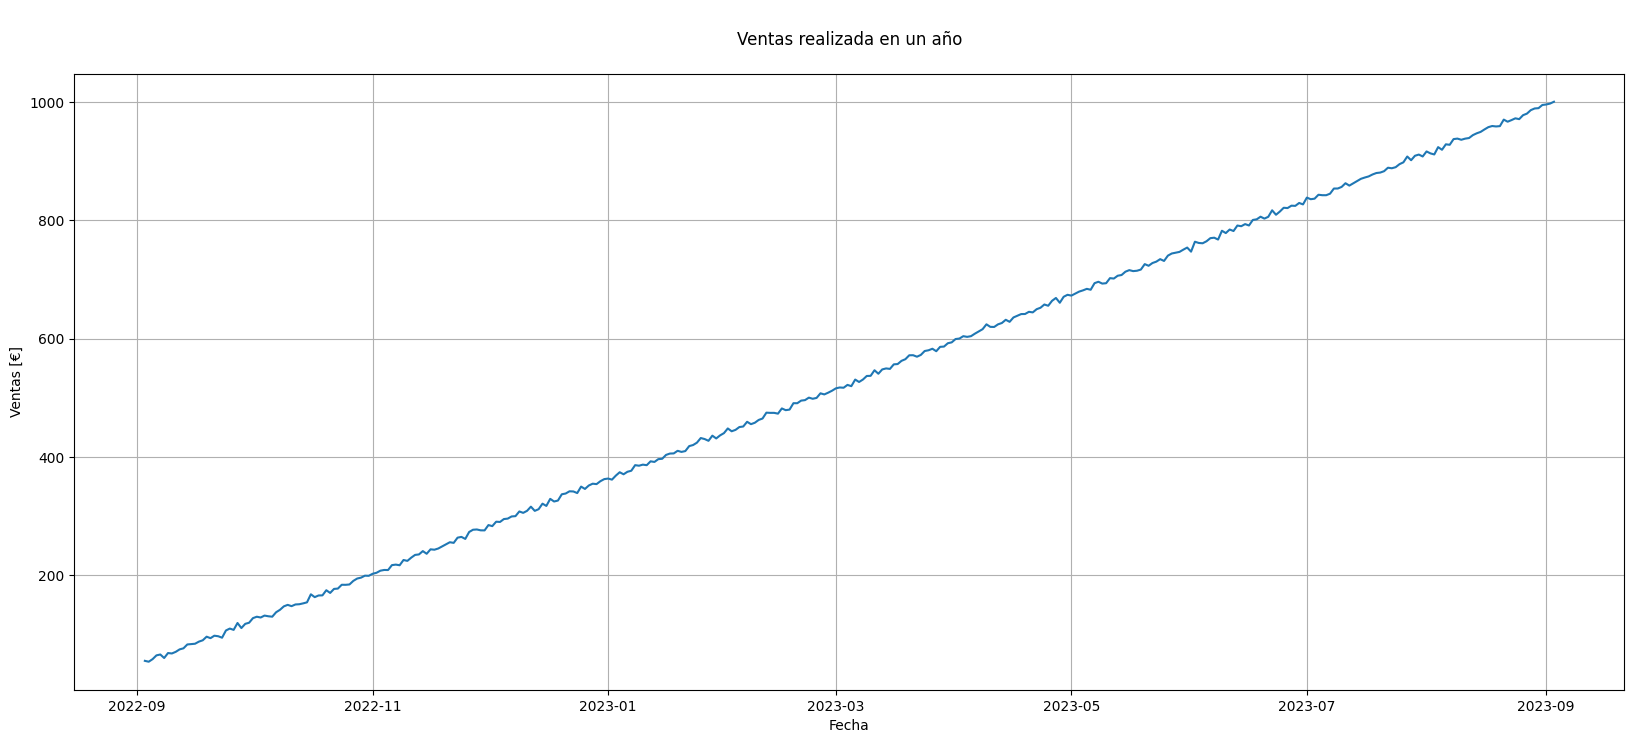

In [ ]:

plt.figure (figsize = (20,8));


plt.plot(df.date, df.sales);
plt.xlabel ('Fecha');
plt.ylabel('Ventas [€]');
plt.title ('\nVentas realizada en un año\n');
plt.grid(True);

plt.show()

Se puede ver que el negocio esta en clara tendencia ascente puesto que no ha parado de crecer sus ventas desde el inicio

La siguiente cuestion a resolver es si es estacionaria para ello utilizaremos el test Dickey-Fuller.

Si el p-valor es menor a 0.05, no se rechaza la hipótesis alternativa y, por lo tanto, la serie temporal es estacionaria.

In [ ]:

test_df = adfuller(df['sales']);

print(f"p-value: {round(test_df[1], 4)}") ; 

p-value: 0.9862


El P-Valor es mayor que 0.05 por lo que se rechaza la Hipótesis Alternativa, tomando que la serie no es estacionaria. Lo cual sera importante cuando vayamos a aplicar el modelo ARIMA.

MODELO ARIMA

In [ ]:
# Diferenciacion para poder utilizar el modelo arima 
df['sales_diff'] = df['sales'].diff().dropna();

In [ ]:
df.head()

,date,sales,sales_diff
0,2022-09-03,55.292157,NaN
1,2022-09-04,53.803211,-1.488946
2,2022-09-05,58.141693,4.338482
3,2022-09-06,64.530899,6.389205
4,2022-09-07,66.013633,1.482734


Vamos a separar las ventas por meses creando la columna Month

In [ ]:

df['date'] = pd.to_datetime(df['date']);

df['month'] = df['date'].dt.month;

In [ ]:

train_set = df[df['month'] <= 9];

test_set = df[df['month'] > 9];

In [ ]:
train_set.set_index('date');
test_set.set_index('date');

In [ ]:
x_train = train_set ['date'];
x_test = test_set ['date'];

y_train = train_set ['sales_diff'];
y_test = test_set ['sales_diff'];

In [77]:
from pmdarima import auto_arima

model = auto_arima(y_train.dropna(), seasonal = False, trace = False, suppress_warnings = True); 

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject